# Introduction to Visualizing Text Data: One-Upping the WordCloud

**Audience:** Teachers/Learners

**Use Case**: Tutorial/How-To

**Difficulty:** Beginner/Intermediate

**Completion Time:** 45 minutes, 15 minutes for Q&A, etc.

**Knowledge Required:**

* Python basics (variables, flow control, creating custom functions, lists, dictionaries)

**Knowledge Recommended:**

* Regular Expressions to help clean up our data (official documentation [here](https://docs.python.org/3/howto/regex.html)—more fun [video version](https://www.youtube.com/watch?v=sa-TUpSx1JA&t=141s) courtesy of Corey Schafer)
* [`WordCloud`](https://amueller.github.io/word_cloud/index.html) visualizations
* Basic understanding of [`matplotlib`](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) for graphing and plotting
* Very basic understanding of [`pandas`](https://pandas.pydata.org/) for tabular data manipulation
* Very basic grasp of the [`circlify` library](https://github.com/elmotec/circlify)

**Learning Objectives:** After this lesson, learners will be able to:

**Research Pipeline:**

1. Research steps before this notebook: grab some data from [Constellate's Dataset Builder](https://constellate.org/)
2. Plot some visualizations of words frequencies in our dataset.
3. Steps after this notebook: find your very own dataset and go to town!
4. Show us the results.

### Getting our Libraries Imported

In [61]:
import gzip
import pandas as pd
# Nice primer on pandas display_options [here](https://towardsdatascience.com/8-commonly-used-pandas-display-options-you-should-know-a832365efa95)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import circlify

### Required Data:

**Data Format**:

* File downloaded from the [Constellate site](https://constellate.org/) in `.gz` format (this file also available from [here](https://github.com/kspicer80/jstor_teaching_demo/blob/main/datasets/law_full.jsonl.gz))

Starting with the , I simply downloaded the built dataset to my local machine (other options for loading the dataset are available [here](https://constellate.org/tutorials/exploring-metadata)—the downloaded  file comes as a `.gz` file, so we need to open that up with the handy [`gzip` library](https://docs.python.org/3/library/gzip.html). We want to do a little bit of work with [`pandas`](https://pandas.pydata.org/docs/) here (we could work, of course, just with the standard `json` library, but we're going to want to do some manipulation on the data and pandas is perfecty suited for that). So let's get the file opened up and into a DataFrame:

### Introduction:

Here in this notebook we are going to be grabbing some data from Constellate, doing a little bit of [exploratory data analysis (EDA)](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15#:~:text=Exploratory%20Data%20Analysis%20refers%20to,summary%20statistics%20and%20graphical%20representations.), and then utilizing some of the data to plot word frequencies in the downloaded data. We are going to look at some of the ways we might one-up the standard WordCloud seen so often in introductory treatments of textual data.

### Lesson:

Here in this notebook we're going to do a little bit of work with the JSTOR Constellate [data builder](https://constellate.org/builder). I started by searching "free speech" and "First Amendment" as keywords, grabbing all the "full text" document types within the "Law" category. Constellate also has a nice feature that gives assigns a "Dataset ID" to each of the datasets one builds. The one for this project is "b7adbb84-6bec-549e-83bb-11aeb045e5f9". 

In [62]:
df = pd.read_json(gzip.open('./datasets/law_full.jsonl.gz'), lines=True)

Initial inspection of the dataframe:

In [63]:
df.head()

,creator,datePublished,docSubType,docType,fullText,id,identifier,isPartOf,issueNumber,language,outputFormat,pageCount,pageEnd,pageStart,pagination,provider,publicationYear,publisher,sourceCategory,tdmCategory,title,url,volumeNumber,wordCount,unigramCount,bigramCount,trigramCount,abstract,collection,editor,hasPartTitle,keyphrase,subTitle
0,[Thomas Reed Powell],1922-01-01,research-article,article,"[MICHIGAN LAW REVIEW VOL. XX JANUARY, 1922 No. 3 THE SUPREME COURT'S CONSTRUCTION OF THE FEDERAL CONSTITUTION IN I920-I92I, III1 IV. PoLIcE POWER THE difficulty of classifying cases on the police power has not evaporated since the review of decisions for the preceding year. The headings there suggested are used here. Classification on the basis of the objects of the legislation appears too precarious to be attempted with any confidence. It seems safer to work along the line of the subject ma...",http://www.jstor.org/stable/1277162,"[{'name': 'issn', 'value': '00262234'}, {'name': 'local_uuid', 'value': 'bc2669a7-d087-3bf4-8b2b-aebe1b9003bf'}, {'name': 'local_doi', 'value': '10.2307/1277162'}, {'name': 'journal_id', 'value': 'michlawrevi'}]",Michigan Law Review,3.0,[eng],"[unigram, bigram, trigram, fullText]",28,288,261,pp. 261-288,jstor,1922,The Michigan Law Review Association,"[Law, Law]",[Law - Civil law],"The Supreme Court's Construction of the Federal Constitution in 1920-1921, III",http://www.jstor.org/stable/1277162,20.0,11348,"{'denied.': 1, 'opposing': 3, 'take': 5, 'retrial': 1, 'interruptions,': 1, 'Utility': 2, 'state;': 1, 'fought': 1, 'Coal': 2, 'prospective': 1, '""Validity': 1, 'franchises,': 1, 'various': 3, 'injured': 1, 'be,': 2, 'affirmed': 2, 'Co.34': 1, 'inferred': 1, 'weight': 1, 'reliance': 1, 'remarked': 1, 'Sentimental': 1, 'side': 2, 'dissent.27': 1, 'TAXATION,': 1, 'world.""': 1, 'jurisdiction': 2, '862;': 1, 'Commissioners,40': 1, 'impose': 1, 'classification': 3, 'immutable': 1, 'conserved': 1,...","{'basis of': 1, 'in 69': 2, 'once the': 1, 'in defiance': 1, 'lease which': 1, '""public utilities""': 1, 'companies indicate': 1, 'MARQUErTE L.': 1, 'employment made': 1, 'are, and': 1, 'not come': 1, '282 (I92I).': 1, 'in Deeds,""': 1, 'the parties': 1, 'of treason': 1, 'occasions feeling': 1, 'on whether': 2, 'so classifying': 1, 'Ct. 252': 1, '28255 U.': 1, 'y14 was': 1, 'Scanlon Co.': 1, 'Brewster Rhoads,': 1, 'state, and': 2, 'denying the': 1, 'BULL. io6': 1, 'Mr. Justices': 1, 'or loss':...","{'manufacturing or domestic': 1, 'Prices of Commodities,""': 1, 'to infer anything': 1, 'of four objecting': 1, 'notes in 34': 1, 'v. Coronado Beach': 1, 'yields substantial compensation': 1, 'grade crossings in': 1, 'in other ways': 1, 'for compensation in': 1, 'Regulation and Housing': 1, 'penalties for delay': 1, 'will be treated': 1, 'demands. We do': 1, 'justifying the regulation': 1, 'unconstitutionality. The problem': 1, 'to certain cities': 1, 'any confidence. It': 1, 'Without previou...",NaN,NaN,NaN,NaN,NaN,NaN
1,"[Elizabeth Goitein, Faiza Patel]",2020-10-22,NaN,report,"[TRANSITION 2020–2021 A Presidential Agenda for Liberty and National Security By Elizabeth Goitein and Faiza Patel PUBLISHED OCTOBER 22, 2020 Brennan Center for Justice at New York University School of Law policy proposal, Table of Contents Foreword . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 3 A B O U T T H E B R E N N A N C E N T E R FO R J U ST I C E Introduction . . . . . . . . . . . . . . . . . . . . . . . ....",http://www.jstor.org/stable/resrep28426,"[{'name': 'local_uuid', 'value': '3dbcbae0-0d2f-3b58-9d5a-c55e6d5b6127'}]",NaN,NaN,[eng],"[unigram, bigram, trigram, fullText]",23,NaN,NaN,NaN,jstor,2020,Brennan Center for Justice,NaN,[Law - Computer law],A Presidential Agenda for Liberty and National Security,http://www.jstor.org/stable/resrep28426,NaN,13697,"{'MacArthur': 1, 'secrecy,': 1, 'com/infectiousdisease/covid19/87632': 1, 'advocacy.': 1, 'white-hous

So we have a dataframe with 33 different columns, we can get a full list of column names:

In [64]:
df.columns

Index(['creator', 'datePublished', 'docSubType', 'docType', 'fullText', 'id',
       'identifier', 'isPartOf', 'issueNumber', 'language', 'outputFormat',
       'pageCount', 'pageEnd', 'pageStart', 'pagination', 'provider',
       'publicationYear', 'publisher', 'sourceCategory', 'tdmCategory',
       'title', 'url', 'volumeNumber', 'wordCount', 'unigramCount',
       'bigramCount', 'trigramCount', 'abstract', 'collection', 'editor',
       'hasPartTitle', 'keyphrase', 'subTitle'],
      dtype='object')

When we built the dataset from Constellate we did ask only for "Full Text" articles, so it helps to just check that we got what we wanted. We can count the number of NaN values under that column as follows:

In [65]:
df['fullText'].isna().sum()

0

Checks out! We can also see how many NaN vlaues there are in the entire dataframe with the following simple little for loop (while also utilizing the really hand [f-string formatting](https://realpython.com/python-f-strings/):

In [66]:
for column in df:
    print(f"The number of NaN values in {column} is: {df[column].isna().sum()}")

The number of NaN values in creator is: 28
The number of NaN values in datePublished is: 0
The number of NaN values in docSubType is: 67
The number of NaN values in docType is: 0
The number of NaN values in fullText is: 0
The number of NaN values in id is: 0
The number of NaN values in identifier is: 0
The number of NaN values in isPartOf is: 42
The number of NaN values in issueNumber is: 67
The number of NaN values in language is: 0
The number of NaN values in outputFormat is: 0
The number of NaN values in pageCount is: 0
The number of NaN values in pageEnd is: 42
The number of NaN values in pageStart is: 42
The number of NaN values in pagination is: 42
The number of NaN values in provider is: 0
The number of NaN values in publicationYear is: 0
The number of NaN values in publisher is: 26
The number of NaN values in sourceCategory is: 42
The number of NaN values in tdmCategory is: 0
The number of NaN values in title is: 0
The number of NaN values in url is: 0
The number of NaN values 

`Pandas`, of course, also has a way to get this information using the .info() method.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creator          82 non-null     object 
 1   datePublished    110 non-null    object 
 2   docSubType       43 non-null     object 
 3   docType          110 non-null    object 
 4   fullText         110 non-null    object 
 5   id               110 non-null    object 
 6   identifier       110 non-null    object 
 7   isPartOf         68 non-null     object 
 8   issueNumber      43 non-null     float64
 9   language         110 non-null    object 
 10  outputFormat     110 non-null    object 
 11  pageCount        110 non-null    int64  
 12  pageEnd          68 non-null     object 
 13  pageStart        68 non-null     object 
 14  pagination       68 non-null     object 
 15  provider         110 non-null    object 
 16  publicationYear  110 non-null    int64  
 17  publisher       

We have a total of 110 rows and the 'fullText' column registers "110 non-null values," so we've got full text for all the entries here. 

In [68]:
nans = df[df['fullText'].isna()]
print(nans)

Empty DataFrame
Columns: [creator, datePublished, docSubType, docType, fullText, id, identifier, isPartOf, issueNumber, language, outputFormat, pageCount, pageEnd, pageStart, pagination, provider, publicationYear, publisher, sourceCategory, tdmCategory, title, url, volumeNumber, wordCount, unigramCount, bigramCount, trigramCount, abstract, collection, editor, hasPartTitle, keyphrase, subTitle]
Index: []


If we wanted to have a closer look at where in the dataframe (by index) the rows that aren't NaNs—i.e. the rows that do actually have an editor listed—rows occur, we simply call:

In [69]:
publisher_nans = df[~df['editor'].isna()]
publisher_nans['editor']

3                                                                                            [Kevin Welner]
14                                                                                         [Michael German]
52    [MICAH C. MCMILLAN, ERIC H. FRENCK, RICHARD A. HANRAHAN, JEFFREY C. CAMPBELL, THOMASA T. HUFFSTUTLER]
Name: editor, dtype: object

So now we can see that rows `3`, `14`, and `52` are the entries with a named editor or editors.

### Investigating the `unigramCount` Column:

Since we're interested in eventually visualizing the word counts in the texts of our dataset, we should first do a little exploring of the key column in question. If we print out the .head() of that column we'll see that we're dealing with a dicitionary in each row that has the word and then the number of times that word shows up in the text:

In [70]:
df['unigramCount'].head()

0    {'denied.': 1, 'opposing': 3, 'take': 5, 'retrial': 1, 'interruptions,': 1, 'Utility': 2, 'state;': 1, 'fought': 1, 'Coal': 2, 'prospective': 1, '"Validity': 1, 'franchises,': 1, 'various': 3, 'injured': 1, 'be,': 2, 'affirmed': 2, 'Co.34': 1, 'inferred': 1, 'weight': 1, 'reliance': 1, 'remarked': 1, 'Sentimental': 1, 'side': 2, 'dissent.27': 1, 'TAXATION,': 1, 'world."': 1, 'jurisdiction': 2, '862;': 1, 'Commissioners,40': 1, 'impose': 1, 'classification': 3, 'immutable': 1, 'conserved': 1,...
1    {'MacArthur': 1, 'secrecy,': 1, 'com/infectiousdisease/covid19/87632': 1, 'advocacy.': 1, 'white-house-location-data-coronavirus/;': 1, 'information': 16, 'communities': 6, 'information,': 5, 'attack': 2, 'problems': 1, 'agencies.': 1, 'existence': 1, 'Institution,': 2, 'scored': 1, 'past': 3, 'range': 1, 'Frieden,': 1, 'role.': 2, 'right': 2, 'crimination”': 1, 'https://www.wsj.com/articles/federal-agencies-use-cellphone-loca-': 1, 'Censored': 1, 'explanations': 1, 'www.justice.gov/op

We can also see just from this very short printout that the dictionaries are not sorted in any way; it might be nice to have the words with the highest counts at the start of the dictionary. How could we handle that? Well, let's write a function to sort the dictionary.

In [71]:
# Here we create our function to sort a dictionary by values from greatest to least:
def sort_a_dictionary_by_values(dictionary):
    sorted_dict = dict(sorted(dictionary.items(), key=lambda x: x[1], reverse=True))
    # Documentation for the `lambda` function available [here](https://www.w3schools.com/python/python_lambda.asp)
    return(sorted_dict)

Now let's test it by creating a simple "toy dictionary" and see if everything works as we want.)

In [72]:
test_dictionary = {'howdy': 5643, 'doody': 89080, 'time': 10}
test_dictionary_sorted = sort_a_dictionary_by_values(test_dictionary)
print(f"Your unsorted dictionary looks like: {test_dictionary}")
print(f"Your sorted dictionary now looks like: {test_dictionary_sorted}")

Your unsorted dictionary looks like: {'howdy': 5643, 'doody': 89080, 'time': 10}
Your sorted dictionary now looks like: {'doody': 89080, 'howdy': 5643, 'time': 10}


Cool!

With our `sort_a_dictionary_by_values` function defined, we can quite easily see which words are the most frequent in each row of the `unigramCount` column. We can even create another column in our dataframe to hold that sorted dictionary:

In [73]:
df['unigramCountSorted'] = df['unigramCount'].apply(sort_a_dictionary_by_values)
df['unigramCountSorted'].head()

0    {'the': 849, 'of': 499, 'to': 337, 'and': 251, 'in': 243, 'a': 189, 'that': 180, 'is': 139, 'L.': 121, 'be': 109, 'was': 108, 'it': 96, 'not': 93, 'by': 87, 'on': 87, 'for': 84, 'The': 79, 'or': 75, 'as': 68, 'state': 67, 'which': 51, 'an': 51, 'REV.': 49, 'may': 47, 'with': 42, 'Justice': 40, 'are': 40, '*': 39, 'its': 37, 'U.': 37, 'REv.': 35, 'statute': 35, 'were': 35, 'Mr.': 35, 'power': 34, 'v.': 34, 'S.': 33, 'Ct.': 31, 'MICH.': 31, 'Sup.': 31, 'had': 31, 'court': 30, 'their': 30, 'pub...
1    {'.': 768, 'and': 490, 'the': 468, 'of': 376, 'to': 299, 'for': 191, 'a': 151, 'in': 147, 'on': 132, 'that': 93, 'The': 83, 'National': 68, 'should': 66, 'as': 63, 'is': 61, 'Brennan': 61, 'Center': 59, 'with': 51, '2020,': 49, 'by': 49, 'A': 47, 'Justice': 45, 'or': 42, 'has': 41, 'president': 41, 'Security': 41, 'are': 38, 'Act': 37, 'an': 37, 'U': 36, '.S': 36, 'from': 35, 'be': 33, '2019,': 33, 'Congress': 32, 'which': 31, 'national': 31, 'have': 30, 'New': 30, 'not': 29, 'law': 29

### Creating Some Word Clouds:

The previous cell block certainly shows us one way of visualizing these counts. Another is the good ol' WordCloud, which sizes the font of a word based on its frequency, i.e. so words that show up more often are printed in larger font sizes. (The font colors also change based upon the frequency.) There are a number of ways we could go about getting the data that we have from Constellate into a nice format to plot in a Word Cloud, but we want to see if we can be a little bit more flexible here. Since the dataset already comes with word counts (counts that we can now sort), it's a pretty easy step to get a WordCloud visualization—a visualization we can use to see if it matches up with what we got in the previous cell. In fact, the [WordCloud library](https://amueller.github.io/word_cloud/) (a go-to library for many text analysis practitioners for generating WordClouds here in the Python ecosystem) already has [a function](https://amueller.github.io/word_cloud/auto_examples/frequency.html?highlight=generate%20from%20frequencies) to create the cloud right from the word frequencies. We can therefore use the word frequencies already stored in the `unigramCountSorted` column of our dataframe. So let's write a simple function that utilizes it and creates the word cloud:

In [74]:
def generate_word_cloud(dict_values):

    wordcloud = WordCloud(width=700, height=700, max_words=100, random_state=1, background_color='gray', colormap='plasma', collocations=False).generate_from_frequencies(dict_values)
    #plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Let's say we wanted to produce a word cloud solely for the text in the first row of our dataframe. Simple enough!

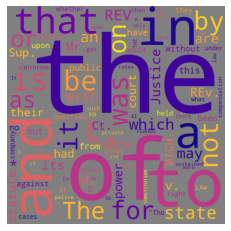

In [79]:
generate_word_cloud(df['unigramCountSorted'].iloc[0])

This would seem to match up and jive well with our printout a couple of cells earlier; we saw there that the words "the," "of," "to," and "and" were at the top of the list—and the visualization here shows that both in terms of those words' font sizes and colors as well.

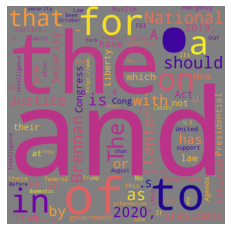

In [81]:
generate_word_cloud(df['unigramCountSorted'].iloc[1])

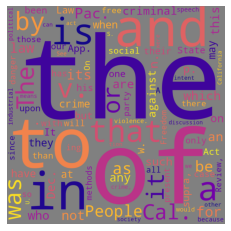

In [80]:
generate_word_cloud(df['unigramCountSorted'].iloc[2])

Of course, it turns out that these words are common in all of the printouts from the `df['unigramCountSorted'].head()` call.

So far we can see a strong motivation for something that most digital text analysts know about all too well. These short words—"the," "and," "to," etc.—are all ones that show up incredibly often in English, but they do not contribute all that much to the meaning of the text. Therefore, in the whole "data cleaning" process, we often spend some time removing words like them from our data. If one hunts around a tiny little bit in the [documentation for the WordCloud class](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html?highlight=generate%20from%20frequencies), they will notice that said documentation explicitly states that if one uses the `generate_from_frequencies` function, the standard stopwords are "[i]gnored if using `generate_from_frequencies`.") Now, what if we wanted to still use our dictionary of word frequencies and remove all of those stopwords from our dictionary? Well,  let's practice a little bit and write our own function to do it using the list of stopwords in WordCloud. We'll initialize a list that contains the standard English stopwords and then remove them from the dictionary with our function. 

First we set the `STOPWORDS` list from the WordCloud library and then create our test list. And, let's show a couple of different ways to do this—one using a good ol' [Python list comprehension](https://realpython.com/list-comprehension-python/) and the other with a custom function we create:

In [83]:
stop_words = set(STOPWORDS)
# We can see all the stopwords WordCloud provides if we simply `print(stop_words)`

def remove_stopwords_from_a_dict(dictionary):
    cleaned_dictionary = {k: v for k, v in dictionary.items() if k not in stop_words}
    return(cleaned_dictionary)

test_dictionary = {'a': 9808, 'an': 83987, 'He Who Must Not Be Named': 3245, 'Harry Potter': 4542324, 'Hermione Granger': 10000000, 'Ronald': 980, 'the': 2, 'of': 56, 'in': 12, 'Sirius Black': 87}

cleaned_test_dictionary = remove_stopwords_from_a_dict(test_dictionary)
cleaned_test_dictionary

{'He Who Must Not Be Named': 3245,
 'Harry Potter': 4542324,
 'Hermione Granger': 10000000,
 'Ronald': 980,
 'Sirius Black': 87}

Looks good—no stopwords showing up ...

In [82]:
# Let's initialize our test list:
#test_list = ['the', 'and', 'has', 'hello', 'howdy', 'doody!']

# Option 1: using a simply list comprehension to remove all the items in the list that are not in the stopwords list:
#cleaned_list = [i for i in test_list if i not in stop_words]

# Option 2: let's write our own function:
#def remove_stopwords_from_a_list(input_list):
    #cleaned_list = [i for i in input_list if i not in stop_words]
    #return(cleaned_list)

Now let's test these two avenues to make sure they both produce the same result (and the result we want too!):

In [ ]:
option_1_cleaned_list = [i for i in test_list if i not in stop_words]
option_2_cleaned_list = remove_stopwords_from_a_list(test_list)
print(option_1_cleaned_list)
print(option_2_cleaned_list)

Yay.

In [ ]:
#def convert_tup_to_dict(list_of_tuples):
    #result = dict(list_of_tuples)
    #return(result)

In [ ]:
test = [('the', 849), ('of', 499), ('to', 337), ('and', 251)]

In [ ]:
result = convert_tup_to_dict(test)
result

In [ ]:
df2 = df.sort_values(by='wordCount', ascending=False).reset_index()
print(df2['wordCount'].head())
print(df2.iloc[0])

In [ ]:
import numpy as np
import seaborn as sns

stop_words = set(STOPWORDS)

def create_df(input):
    list_words = input.split(' ')
    set_words_full = list(set(list_words))

    set_words = [i for i in set_words_full if i not in stop_words]
    count_words = [list_words.count(i) for i in set_words]

    df = pd.DataFrame(zip(set_words, count_words), columns=['words', 'count'])
    df.sort_values('count', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [ ]:
print(stop_words)

In [ ]:
def get_color_dict(palette, number, start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df_of_interest = df.iloc[0]
print(df_of_interest)

In [ ]:
full_text_of_interest = df_of_interest['fullText']
full_string = " ".join(full_text_of_interest)
print(full_string[0:500])

In [ ]:
import re
stop_words = set(STOPWORDS)
list_words = full_string.split(' ')
list_words = [re.sub(r'[0-9]', '', i) for i in list_words]
list_words_lower = [x.lower() for x in list_words]
list_words_alpha_only = [x for x in list_words_lower if x.isalpha() == True]
set_words_full = list(set(list_words_alpha_only))
set_words = [i for i in set_words_full if i not in stop_words]
count_words = [list_words_alpha_only.count(i) for i in set_words]

counts_df = pd.DataFrame(zip(set_words, count_words), columns=['word', 'count'])
counts_df.sort_values('count', ascending=False, inplace=True)
counts_df.reset_index(drop=True, inplace=True)
counts_df.head(10)

In [ ]:
ax = sns.barplot(x = 'word', y = 'count', data=counts_df.iloc[0:100], alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [ ]:
index_list = [[i[0], i[-1]+1] for i in np.array_split(range(100), 5)]
print(index_list)
n = counts_df['count'].max()
color_dict = get_color_dict('plasma', n, 1)

fig, axs = plt.subplots(1, 5, figsize=(16, 8), facecolor='white', squeeze=False)
for col, idx in zip(range(0, 5), index_list):
    df = counts_df[idx[0]:idx[-1]]
    #print(df)
    label = [w + ': ' + str(n) for w, n in zip(df['word'], df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0, 20))

    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient='h', ax = axs[0][col], palette=color_l)
    axs[0][col].set_xlim(0, n+1)
    axs[0][col].set_yticklabels(label, fontsize=12)
    #axs[0][col].spines['bottom'].set_color('white')
    #axs[0][col].spines['right'].set_color('white')
    #axs[0][col].spines['left'].set_color('white')
    #axs[0][col].spines['top'].set_color('white')

plt.tight_layout()
plt.show()

In [ ]:
n = 30
pal = list(sns.color_palette(palette='tab10', n_colors=n).as_hex())

import plotly.express as px

fig = px.pie(counts_df[0:30], values='count', names='word', color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', hole=.6, hoverinfo='label+percent+name')

fig.update_layout(width=800, height=600, margin=dict(t=0, l=0, r=0, b=0))
fig.show()

In [ ]:
test_string = '''
MICHIGAN LAW REVIEW VOL. XX JANUARY, 1922 No. 3 THE SUPREME COURT'S CONSTRUCTION OF THE FEDERAL CONSTITUTION IN I920-I92I, III1 IV. POLICE POWER THE difficulty of classifying cases on the police power has not evaporated since the review of decisions for the preceding year. The headings there suggested are used here. Classification on the basis of the objects of the legislation appears too precarious to be attempted with any confidence. It seems safer to work along the line of the subject matters with which the legislation deals. V. EMINENT DOMAIN and then here is some more text!
'''

contents = ['IV. POLICE POWER', 'V. EMINENT DOMAIN']

processed_text = []

part_1 = test_string.split("IV. POLICE POWER")[1]
part_2 = test_string.split('V. EMINENT DOMAIN')[1]
print(part_1)
print(part_2)

In [ ]:
contents = ['IV. POLICE POWER', 'V. EMINENT DOMAIN']

with open('full_text_of_entry_zero.txt', encoding='utf-8') as f:
    text = f.read()

test_string = ''' 
        Here is some filler material. IV. POLICE POWER Here is some text that goes under this particular section. V. EMINENT DOMAIN And then here is some text under a different section and heading.
'''

start = text.find(contents[0])
end = text.find(contents[1])
print(start)
print(end)

section_1 = text[start:end]
#print(section_1)

section_2 = text[end:len(text)]
print(section_2)


In [ ]:
def get_df(input_text):
    list_words = input_text.split(' ')
    set_words_full = list(set(list_words))
    
    #remove stop words
    set_words = [i for i in set_words_full if i not in stop_words]
    
    #count each word
    count_words = [list_words.count(i) for i in set_words]
    
    #create DataFrame
    df = pd.DataFrame(zip(set_words, count_words), columns=['words','count'])
    df.sort_values('count', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [ ]:
combined_sections = section_1.split(' ') + section_2.split(' ')

#print(combined_sections)
df_section_words = [list(get_df(i)['words'][0:50]) for i in combined_sections]
df_section_counts = [list(get_df(i)['count'][0:50]) for i in combined_sections]
df_section_contents = [[x.lower()] * len(y) for x, y in zip(contents, df_section_words)]

df_cont = pd.DataFrame(zip(sum(df_section_contents, []), sum(df_section_words, []), sum(df_section_counts, [])), columns=['contents', 'words', 'counts'])
df_cont.head(20)

In [ ]:
fig = px.sunburst(df, path=['word'], values='count')
fig.show()

In [ ]:
import numpy as np
fig = px.treemap(counts_df[0:50], path=[px.Constant("word counts"), 'word'],
    values = 'count',
    color='count',
    color_continuous_scale='plasma',
    color_continuous_midpoint=np.average(counts_df['count']))

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()


In [ ]:
import circlify

circles = circlify.circlify(counts_df['count'][0:30].tolist(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0))

n = counts_df['count'][0:30].max()
color_dict = get_color_dict('plasma', n, 1)

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+ circle.r, abs(circle.y)+circle.r) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

labels = list(counts_df['word'][0:30])
counts = list(counts_df['count'][0:30])
labels.reverse()
counts.reverse()

for circle, label, count in zip(circles, labels, counts):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color=color_dict.get(count)))
    plt.annotate(label + '\n' + str(count), (x,y), size=12, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
df = pd.read_json(gzip.open('law_full.jsonl.gz'), lines=True)
df['datePublished'] = pd.to_datetime(df['datePublished'])
df['year'] = pd.DatetimeIndex(df['datePublished']).year
df.year.head()
df.groupby(['year'])['id'].agg('count').plot.bar()

### Top2Vec Topic Modeling:

Let's see what we can see if we do a little topic modeling with our dataset using the really wonderful little library [Top2Vec](https://github.com/ddangelov/Top2Vec).

In [ ]:
from top2vec import Top2Vec

In [ ]:
df = pd.read_json(gzip.open('law_full.jsonl.gz'), lines=True)

df['liststring'] = df['fullText'].transform(lambda x: " ".join(map(str, x)))
docs = df['liststring'].tolist()

In [ ]:
top2vec_model = Top2Vec(docs)

In [ ]:
vectors = top2vec_model._get_document_vectors()

In [ ]:
top2vec_model.get_num_topics()

In [ ]:
top2vec_model.topic_words

In [ ]:
documents, document_scores, document_ids = top2vec_model.search_documents_by_topic(topic_num=0, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc[0:250])
    print("-----------")

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = top2vec_model.search_topics(keywords=["speech"], num_topics=2)
#print(topic_nums)
for topic_words, word_scores, topic_scores, topic_nums in zip(topic_words, word_scores, topic_scores, topic_nums):
    print(topic_words, word_scores, topic_scores, topic_nums)

In [ ]:
from top2vec import Top2Vec
import umap.plot
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def generate_documents_plot(self, background_color="white", reduced=False):
    """
    Create a documents and topics scatter plot.
    A documents and topics scatter plot will be generated and displayed.
    Documents on the same topic display in the same color. 
    On the plot, circles mean documents, and numbers mean the number of 
    topic. 
    Cautions: The plot should only be considered as approximate information
    because it is a result of dimension reduction from 5D to 2D. And it could
    be hard to distinguish for more than 20 topics. In this case, use the
    reduced option.
    Parameters
    ----------
    background_color : str (Optional, default='white')
        Background color for the plot. Suggested options are:
            * white
            * black
    reduced: bool (Optional, default False)
        Original topics are used by default. If True the
        reduced topics will be used.
    Returns
    -------
    A matplotlib plot of documents and topics
    """

    if reduced:
        self._validate_hierarchical_reduction()
        topic_vectors = self.topic_vectors_reduced
        topic_sizes, topic_nums = self.get_topic_sizes(reduced=True)
        doc_topics = self.doc_top_reduced
        doc_dist = self.doc_dist_reduced
    else:
        topic_vectors = self.topic_vectors
        topic_sizes, topic_nums = self.get_topic_sizes()
        doc_topics = self.doc_top
        doc_dist = self.doc_dist
    if len(topic_nums) <= 12:
        cmap = 'plasma'
    elif len(topic_nums) <= 20:
        cmap = 'inferno'
    else:
        cmap = 'viridis'
    # Args for UMAP. Same as current args except n_components to plot graph
    #umap_args_for_plot = self.umap_args.copy()
    umap_args_for_plot = umap_args
    # Dimension reduction
    document_vectors = self._get_document_vectors()
    topic_vectors = topic_vectors
    umap_model = umap.UMAP(**umap_args_for_plot, random_state=42).fit(document_vectors)  #  + self.topic_words
    document_vectors_2d = umap_model.embedding_  # same as umap_model.transform(self._get_document_vectors())
    topic_vectors_2d = umap_model.transform(topic_vectors)
    ## Draw a graph
    fig = plt.figure(figsize=(16, 12))
    ax = fig.subplots()
    ax.axis("off")
    fig.set_facecolor(background_color)
    # Draw document vectors
    ax.scatter(*document_vectors_2d.T, 
                s=20, c=doc_topics, cmap=cmap, alpha=0.7,  # linewidth=1, 
                )
    # Draw topic vectors
    ax.scatter(*topic_vectors_2d.T, 
                s=200, linewidth=2, c=topic_nums, cmap=cmap, alpha=0.4,
                )
    for topic_num, topic_vector_2d in zip(topic_nums, topic_vectors_2d):
        ax.annotate(topic_num, 
                    topic_vector_2d,
                    horizontalalignment='center',
                    verticalalignment='center',
                    size=10,
                    color='white') 
    plt.show()
    

top2vec_model_for_plot = top2vec_model

umap_args = {
    "n_neighbors": 15,
    "n_components": 2,
    "metric": "cosine",
    "min_dist": 0.10,
    'spread': 1
}

generate_documents_plot(top2vec_model_for_plot)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
nlp.max_length = 1262030
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']

df['liststring'] = df['fullText'].transform(lambda x: " ".join(map(str, x)))
docs = df['liststring'].tolist()

tokens = []
for summary in nlp.pipe(docs):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)


In [ ]:
df['tokens'] = tokens
#df['tokens']

In [ ]:
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(df['tokens'])
print(dictionary.token2id)

print(dictionary['t'])

Let's increase the quantity of data at our disposal here!

In [ ]:
file_path = '/Users/spicy.kev/Desktop/supreme-court-opinions-by-author.jsonl.gz'
supreme_court_opinions_df = pd.read_json(gzip.open(file_path), lines=True)

In [ ]:
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

# Create corpus
corpus = [dictionary.doc2bow(doc) for doc in df['tokens']]

lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)

In [ ]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [ ]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = df['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [ ]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
from matplotlib import style
style.use('dark_background')

lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

The built dataset has all of the unigrams and their counts in the `unigramCount` as a dictionary—it might be nice to sort them in descending order with the word possesssing the highest count on down. Let's write a simple function to sort the dictionary of unigrams (using the [sorted function](https://www.w3schools.com/python/ref_func_sorted.asp#:~:text=The%20sorted()%20function%20returns,string%20values%20AND%20numeric%20values)):

We could then create a new column (if we wanted) to hold the sorted dictionary using the pandas [`apply` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html):

In [ ]:
df['sorted_unigram_dict'] = df['unigramCount'].apply(sort_a_dictionary_by_values)

Of course, we could also create a list with all the columns we wanted to apply this function to and then write a simply for loop to apply it to all the columns in our list:

In [ ]:
columns = ['unigramCount', 'bigramCount', 'trigramCount']
for column in columns:
    df[f"sorted_{column}_dict"] = df[column].apply(sort_a_dictionary_by_values)

# Then we just check to see that the function is doing what we hope it is:
df[['sorted_unigramCount_dict', 'sorted_bigramCount_dict', 'sorted_trigramCount_dict']].head()

(We might come back and utilize this a little bit more.)